In [1]:
import pandas as pd


data=pd.read_parquet('revenue.parquet')


# 1. Understand the Data :

Inspect the data: Check for missing values, data types, and distributions.

In [2]:
print(data)

       location       date       revenue
0             5 2014-07-01  17681.898243
1             1 2014-07-01  11693.520855
2             4 2014-07-01   6764.670585
3            10 2014-07-01   8222.219120
4             7 2014-07-01   8431.575505
...         ...        ...           ...
25958         7 2024-06-29  17446.781391
25959         2 2024-06-29  19287.190284
25960         3 2024-06-29  11625.424792
25961         8 2024-06-29  70624.065275
25962         6 2024-06-29  16692.680327

[25963 rows x 3 columns]


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25963 entries, 0 to 25962
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   location  25963 non-null  int64         
 1   date      25963 non-null  datetime64[ns]
 2   revenue   25963 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 608.6 KB
None


In [4]:
print(data.describe())

           location                           date        revenue
count  25963.000000                          25963   25963.000000
mean       5.071332  2019-08-20 14:29:06.824327168   17100.383237
min        1.000000            2014-07-01 00:00:00    1727.818706
25%        3.000000            2017-03-03 00:00:00    9596.266650
50%        5.000000            2019-09-23 00:00:00   12447.608673
75%        7.000000            2022-02-09 00:00:00   18994.324176
max       10.000000            2024-06-29 00:00:00  109512.420712
std        2.826124                            NaN   12238.206847


print(data.isnull().sum())

# 2. Preprocess the Data :

### - Handle missing data :
We confirmed no missing values in the data [.info()]
  
### - Feature Engineering :
1. Covert the date column as **datetime object** 

In [5]:
data['date'] = pd.to_datetime(data['date'])

2. Add Time-based Features from the date to capture time pattern in sales:
Features to add:

**day_of_week:** Day of the week (0 = Monday, 6 = Sunday).

**month:** Month of the year.

**is_weekend:** Whether the date falls on a weekend or not (useful to capture patterns in sales that may vary by day).


In [6]:
data['day_of_week'] = data['date'].dt.dayofweek
print(data['day_of_week'].unique())

data['month'] = data['date'].dt.month
print(data['month'].unique())

data['is_weekend'] = (data['day_of_week']==5).astype(int)


[1 2 3 4 5 0]
[ 7  8  9 10 11 12  1  2  3  4  5  6]


3. Encode Categorical Features : 

The **location** column is currently numeric but should be treated as a categorical feature.

Here we use **One-Hot Encoding**. This will create binary columns for each unique value in locations. 

Other Option is **lable Encoding** which uses if there are too many locations. 

In [7]:
data = pd.get_dummies(data, columns=['location'])
print(data)

            date       revenue  day_of_week  month  is_weekend  location_1  \
0     2014-07-01  17681.898243            1      7           0       False   
1     2014-07-01  11693.520855            1      7           0        True   
2     2014-07-01   6764.670585            1      7           0       False   
3     2014-07-01   8222.219120            1      7           0       False   
4     2014-07-01   8431.575505            1      7           0       False   
...          ...           ...          ...    ...         ...         ...   
25958 2024-06-29  17446.781391            5      6           1       False   
25959 2024-06-29  19287.190284            5      6           1       False   
25960 2024-06-29  11625.424792            5      6           1       False   
25961 2024-06-29  70624.065275            5      6           1       False   
25962 2024-06-29  16692.680327            5      6           1       False   

       location_2  location_3  location_4  location_5  location

# 3- Data Visulaization 
Before running ML alogorthms, it is crucial to geain insights into data, understand patterns, trends and relationship between variables. 

In the following, I visulaize changes in revenue across different variables:

### I. Daily Revenue over time 

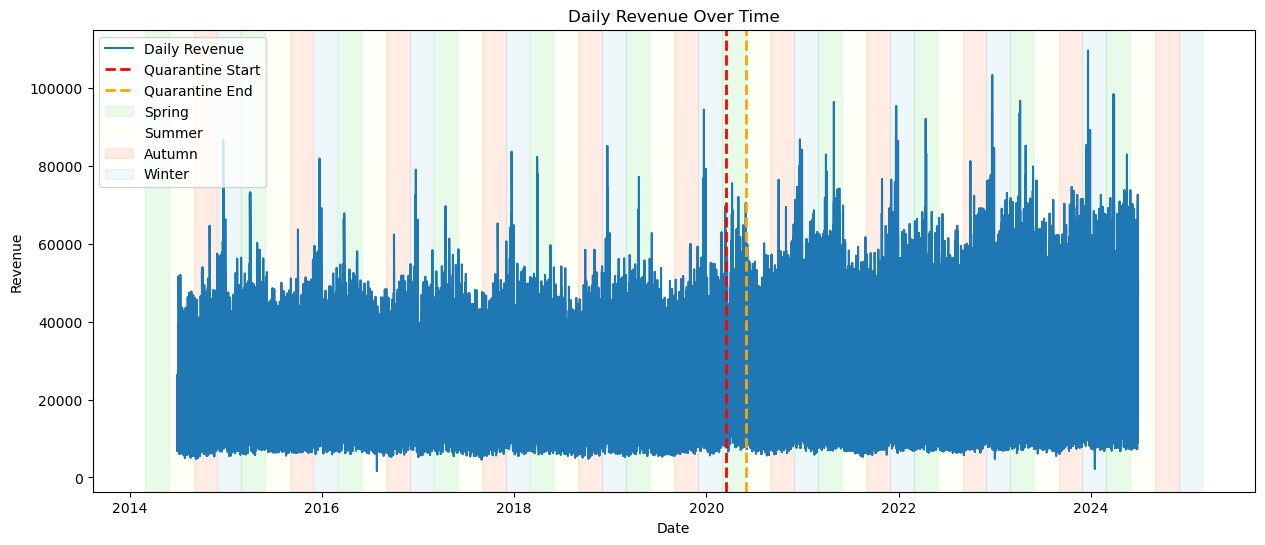

In [11]:
# import packages

import matplotlib.pyplot as plt
import pandas as pd 

plt.figure(figsize=(15,6))
plt.plot(data['date'], data['revenue'], label='Daily Revenue')
#---------------------------------------------------------------
# Dates for the COVID-19 quarantine period
quarantine_start = pd.to_datetime('2020-03-15')
quarantine_end = pd.to_datetime('2020-05-30')
# Adding vertical lines to indicate the start and end of the quarantine
plt.axvline(quarantine_start, color='red', linestyle='--', linewidth=2, label='Quarantine Start')
plt.axvline(quarantine_end, color='orange', linestyle='--', linewidth=2, label='Quarantine End')
#---------------------------------------------------------------
# Define the start and end of each season
years = data['date'].dt.year.unique()  # Get unique years in the dataset

# Define colors for each season
season_colors = {
    'spring': 'lightgreen',
    'summer': 'lightyellow',
    'autumn': 'lightsalmon',
    'winter': 'lightblue'
}

for year in years:
    # Defining start and end of each season for the given year
    spring_start = pd.to_datetime(f'{year}-03-01')
    spring_end = pd.to_datetime(f'{year}-05-31')
    summer_start = pd.to_datetime(f'{year}-06-01')
    summer_end = pd.to_datetime(f'{year}-08-31')
    autumn_start = pd.to_datetime(f'{year}-09-01')
    autumn_end = pd.to_datetime(f'{year}-11-30')
    winter_start = pd.to_datetime(f'{year}-12-01')
    winter_end = pd.to_datetime(f'{year}-02-28') + pd.DateOffset(years=1)

    # Shading each season using axvspan
    plt.axvspan(spring_start, spring_end, color=season_colors['spring'], alpha=0.2, label='Spring' if year == years[0] else "")
    plt.axvspan(summer_start, summer_end, color=season_colors['summer'], alpha=0.2, label='Summer' if year == years[0] else "")
    plt.axvspan(autumn_start, autumn_end, color=season_colors['autumn'], alpha=0.2, label='Autumn' if year == years[0] else "")
    plt.axvspan(winter_start, winter_end, color=season_colors['winter'], alpha=0.2, label='Winter' if year == years[0] else "")
#---------------------------------------------------------------



plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.title('Daily Revenue Over Time')
plt.show()

## II. Revenue Change by Month (Seasonal Trend)

Plots the average revenue across each month of the year.

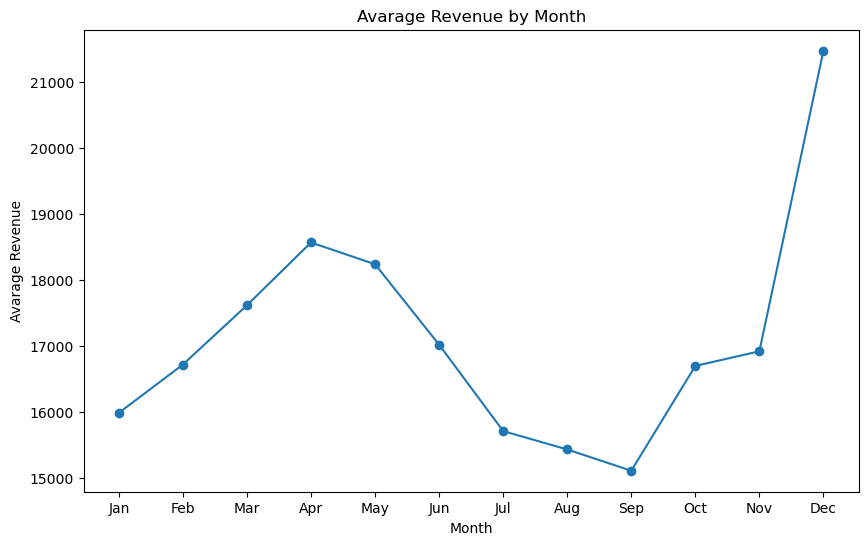

In [17]:
#month is already extracted in the data set (check box 6)

# Group Revenue by month
revenue_by_month = data.groupby('month')['revenue'].mean()

#plotting
plt.figure(figsize=(10,6))
revenue_by_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Avarage Revenue')
plt.title('Avarage Revenue by Month')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
# day of week already extracted in the data set
